#Predicting Diabetes Onset


Group Number : 41

Student Name 1 : Kahatagahawatta YPU (EG/2021/4592)

Student Name 2 : Nirmani GAKS (EG/2021/4693)

#Introduction

Diabetes is a chronic disease affecting millions worldwide. Early detection and management are crucial to mitigating serve health complications. This project employs machine learning techniques to predict the likelihood of diabetes based on clinical parameters. Using the logistic regression algorithm and random forest, this study explores an optimal approach to improve classification accuracy.

#Literature Survey

Logistic Regression is a simple, interpretable model used widely for binary classification in healthcare. Random Forest, an ensemble method, excels at capturing complex, non-linear relationships and often delivers higher accuracy. Previous studies highlight the importance of preprocessing and feature selection for optimal model performance, which this project builds upon. Data set link : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

#Dataset Discription

The dataset used is the Pima Indians Diabetes Dataset, consisting of 768 records with the following features:


*   Pregnancies: Number of pregnancies.
*   Glucose: Plasma glucose concentration.


*   BloodPressure: Diastolic blood pressure (mm Hg).
*  SkinThickness: Triceps skinfold thickness (mm).


*   Insulin: 2-hour serum insulin (mu U/ml).
*   BMI: Body mass index (weight in kg/(height in m)^2).


*   DiabetesPedigreeFunction: Diabetes pedigree function (a measure of genetic risk).
*   Age: Age (years).


*   Outcome: Binary target variable (1 = diabetes, 0 = no diabetes).

Key dataset statistics:



*   Instances: 768
*   Features: 8 (excluding the target variable)


*   Missing values were replaced with the mean or median, depending on the feature.










In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load the dataset
diabetes_df= pd.read_csv("/content/drive/MyDrive/Machine Learning Project/diabetes.csv")
# Create a copy to avoid altering the original data
diabetes_df_copy = diabetes_df.copy(deep=True)

diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# View initial information about the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Detailed statistics
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
#  Check for duplicate records
print(f"\nNumber of duplicate rows: {diabetes_df_copy.duplicated().sum()}")



Number of duplicate rows: 0


In [ ]:
# Remove duplicate records if any
diabetes_df_copy = diabetes_df_copy.drop_duplicates()
print("Duplicates removed (if any).")

Duplicates removed (if any).


In [ ]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose,BloodPressure,SkinThickness,Insulin,BMI can have an invalid zero value.So replace zeros with NAN because it would be easier to counting them and zeros need to be replace with suitable values.


In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


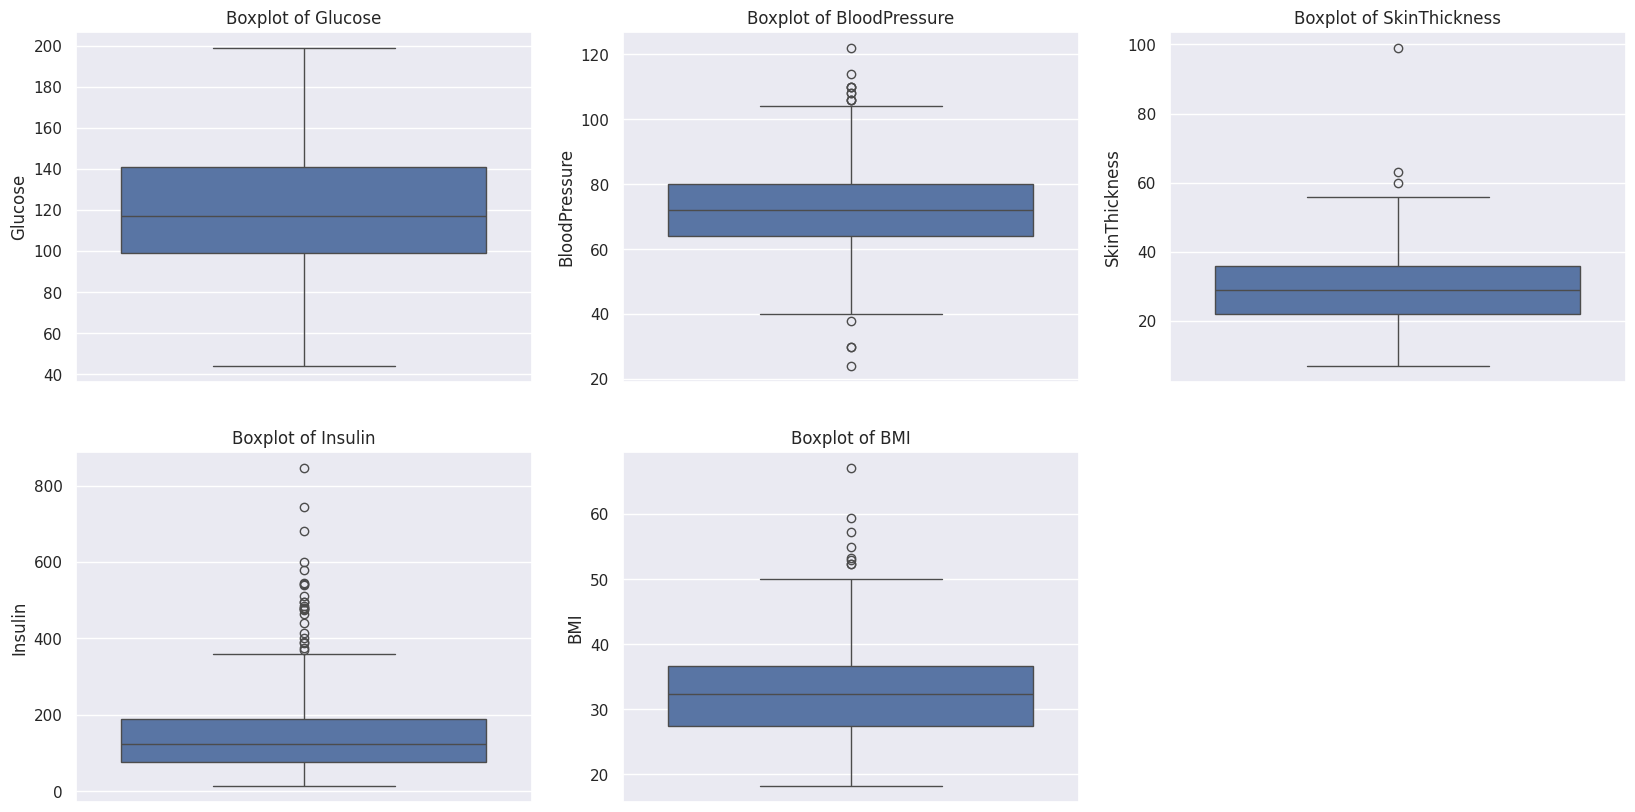

In [ ]:
# Outlier Detection and Treatment
# Visualize the boxplots to detect outliers
# Columns to check for missing or invalid values
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_replace):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=diabetes_df_copy[column])
    plt.title(f'Boxplot of {column}')

In [ ]:
# Outlier treatment using multiple methods (trimming, capping, Winsorization)
# Define a function to treat outliers using the IQR method (capping)
def cap_outliers(column):
    Q1 = diabetes_df_copy[column].quantile(0.25)
    Q3 = diabetes_df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diabetes_df_copy[column] = np.clip(diabetes_df_copy[column], lower_bound, upper_bound)


In [ ]:
# Apply outlier treatment to selected columns
for col in columns_to_replace:
    cap_outliers(col)

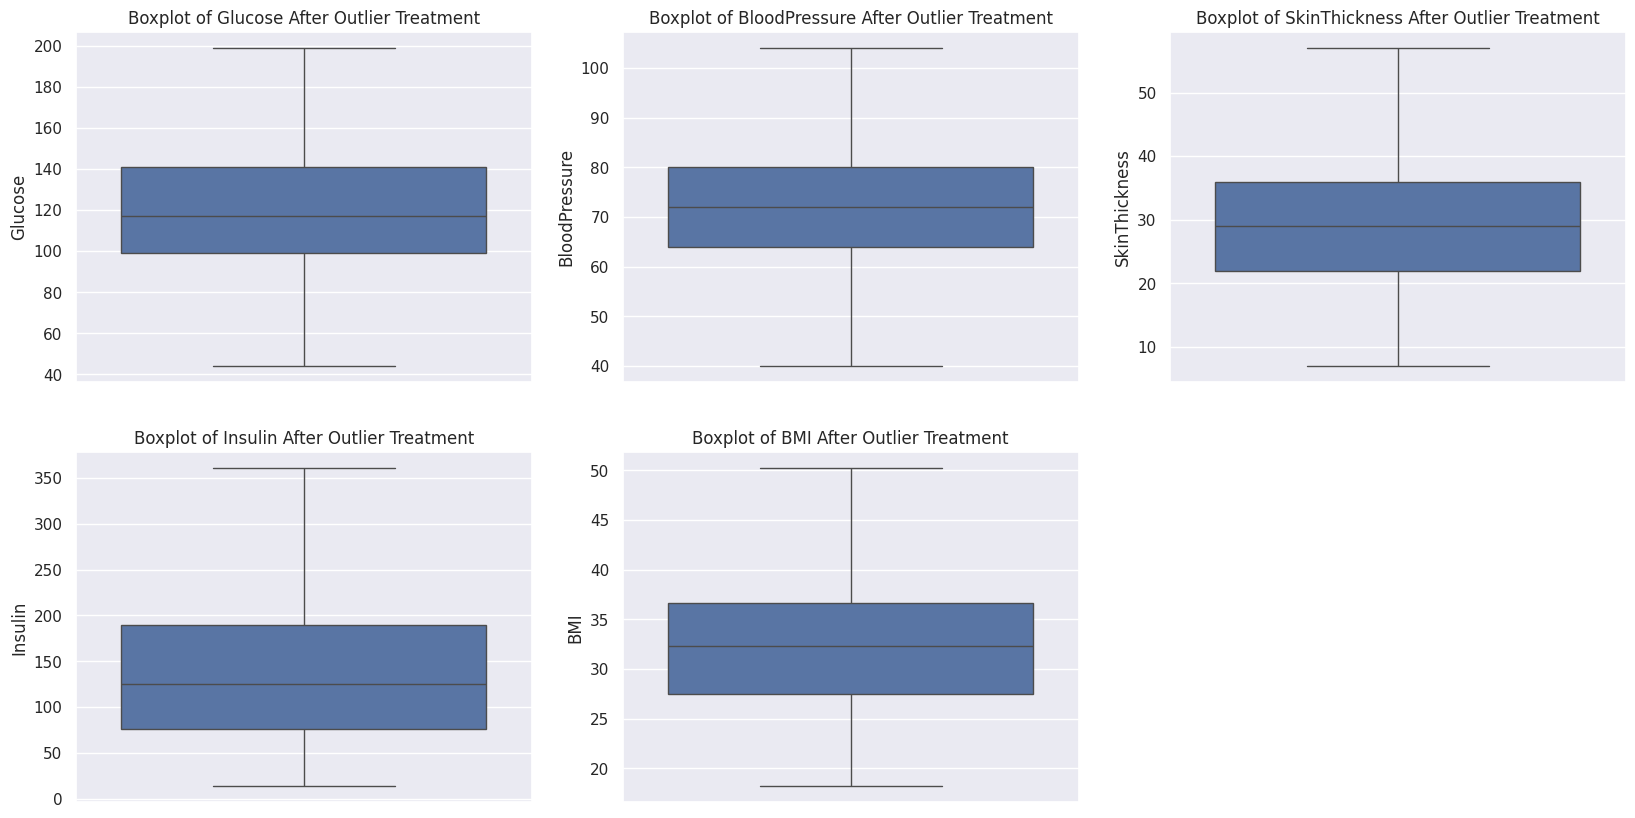

In [ ]:
# Verify outlier treatment by plotting boxplots again
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_replace):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=diabetes_df_copy[column])
    plt.title(f'Boxplot of {column} After Outlier Treatment')

**Data Visualization**

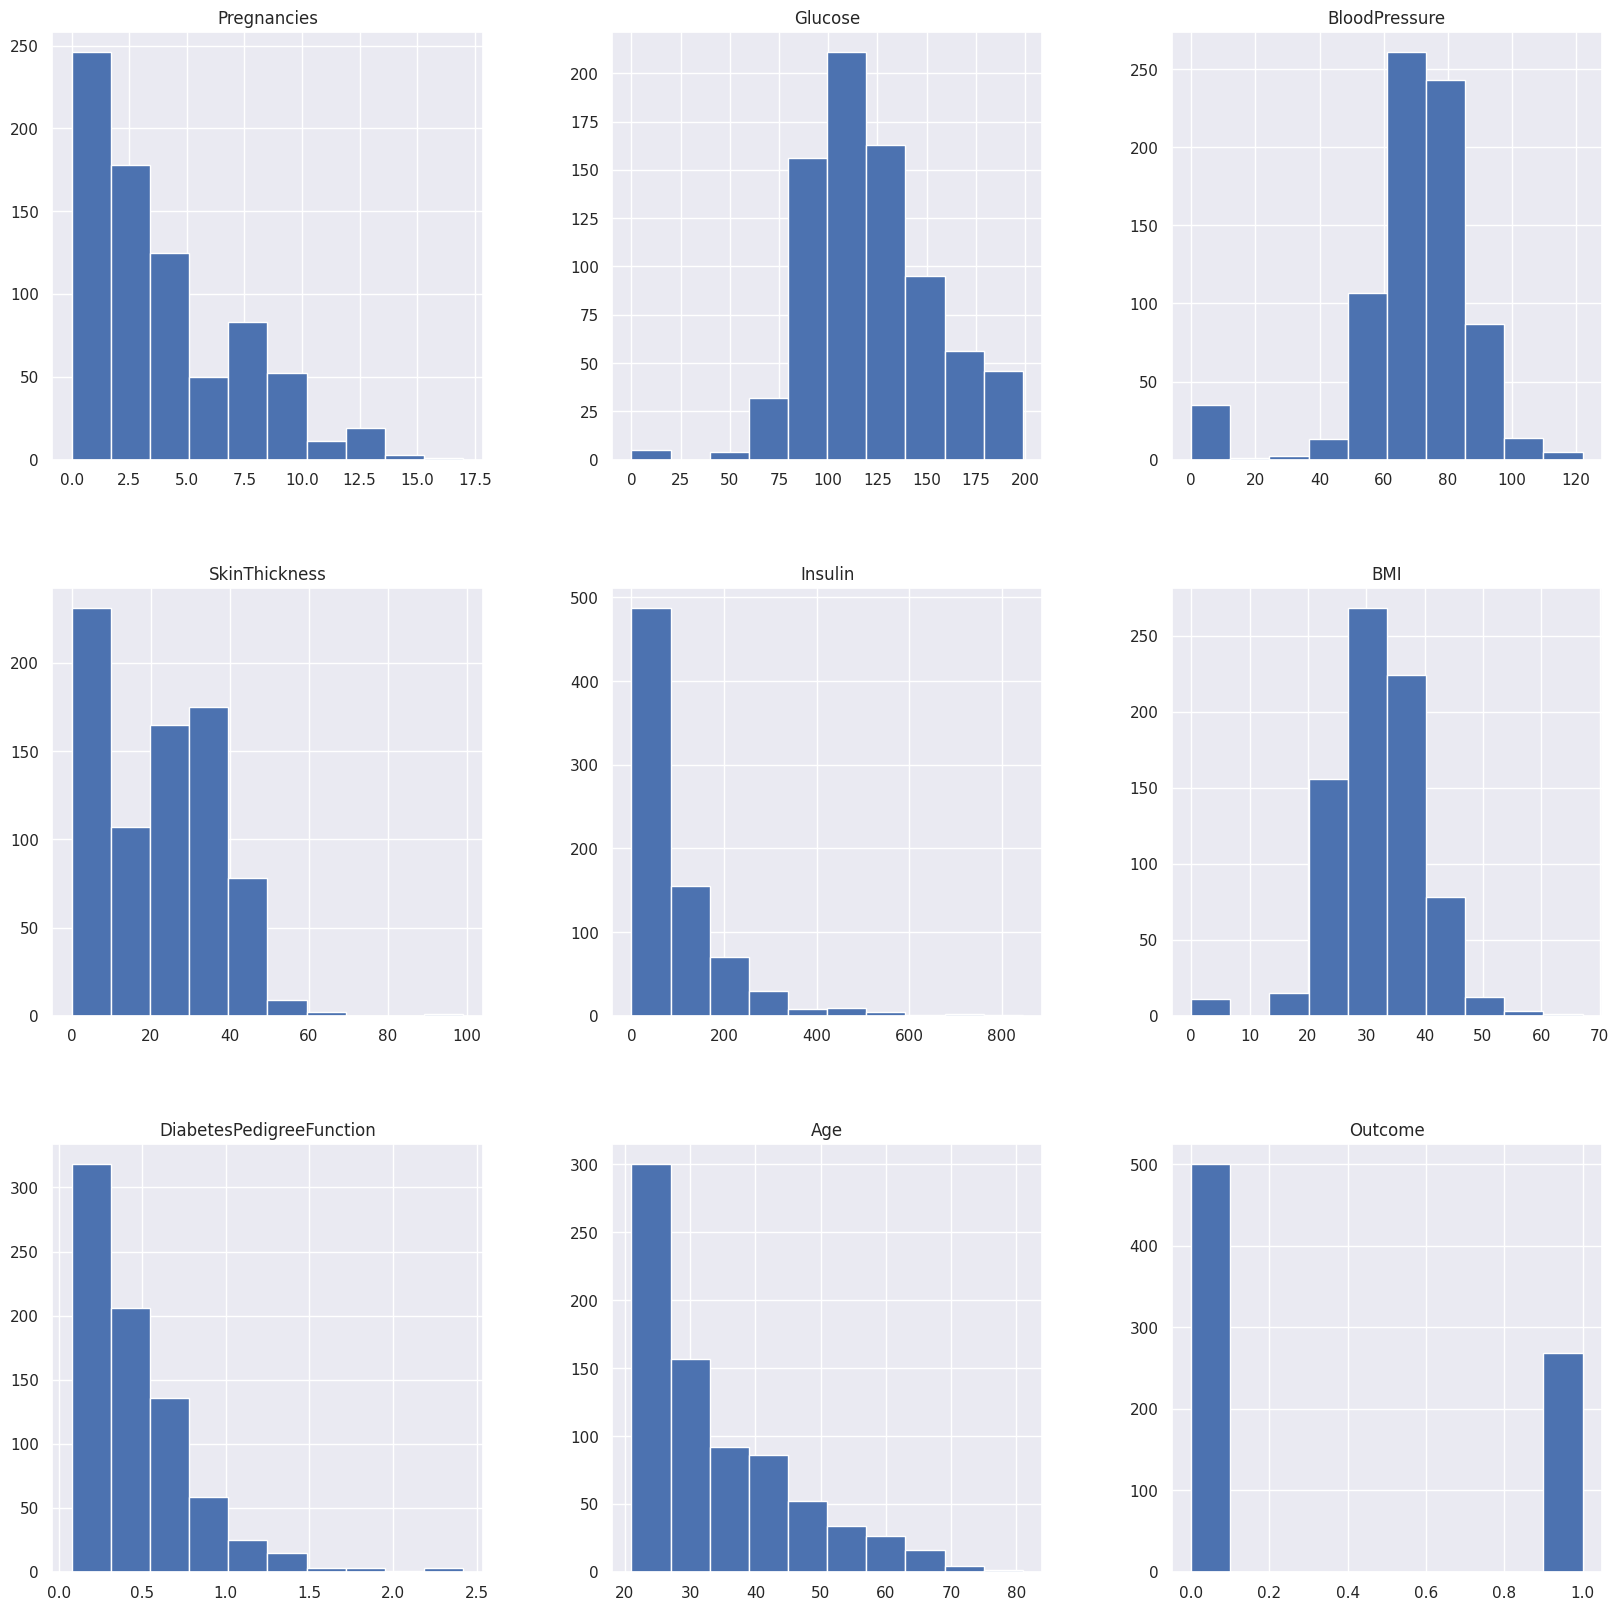

In [ ]:
p = diabetes_df.hist(figsize = (20,20))

In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)


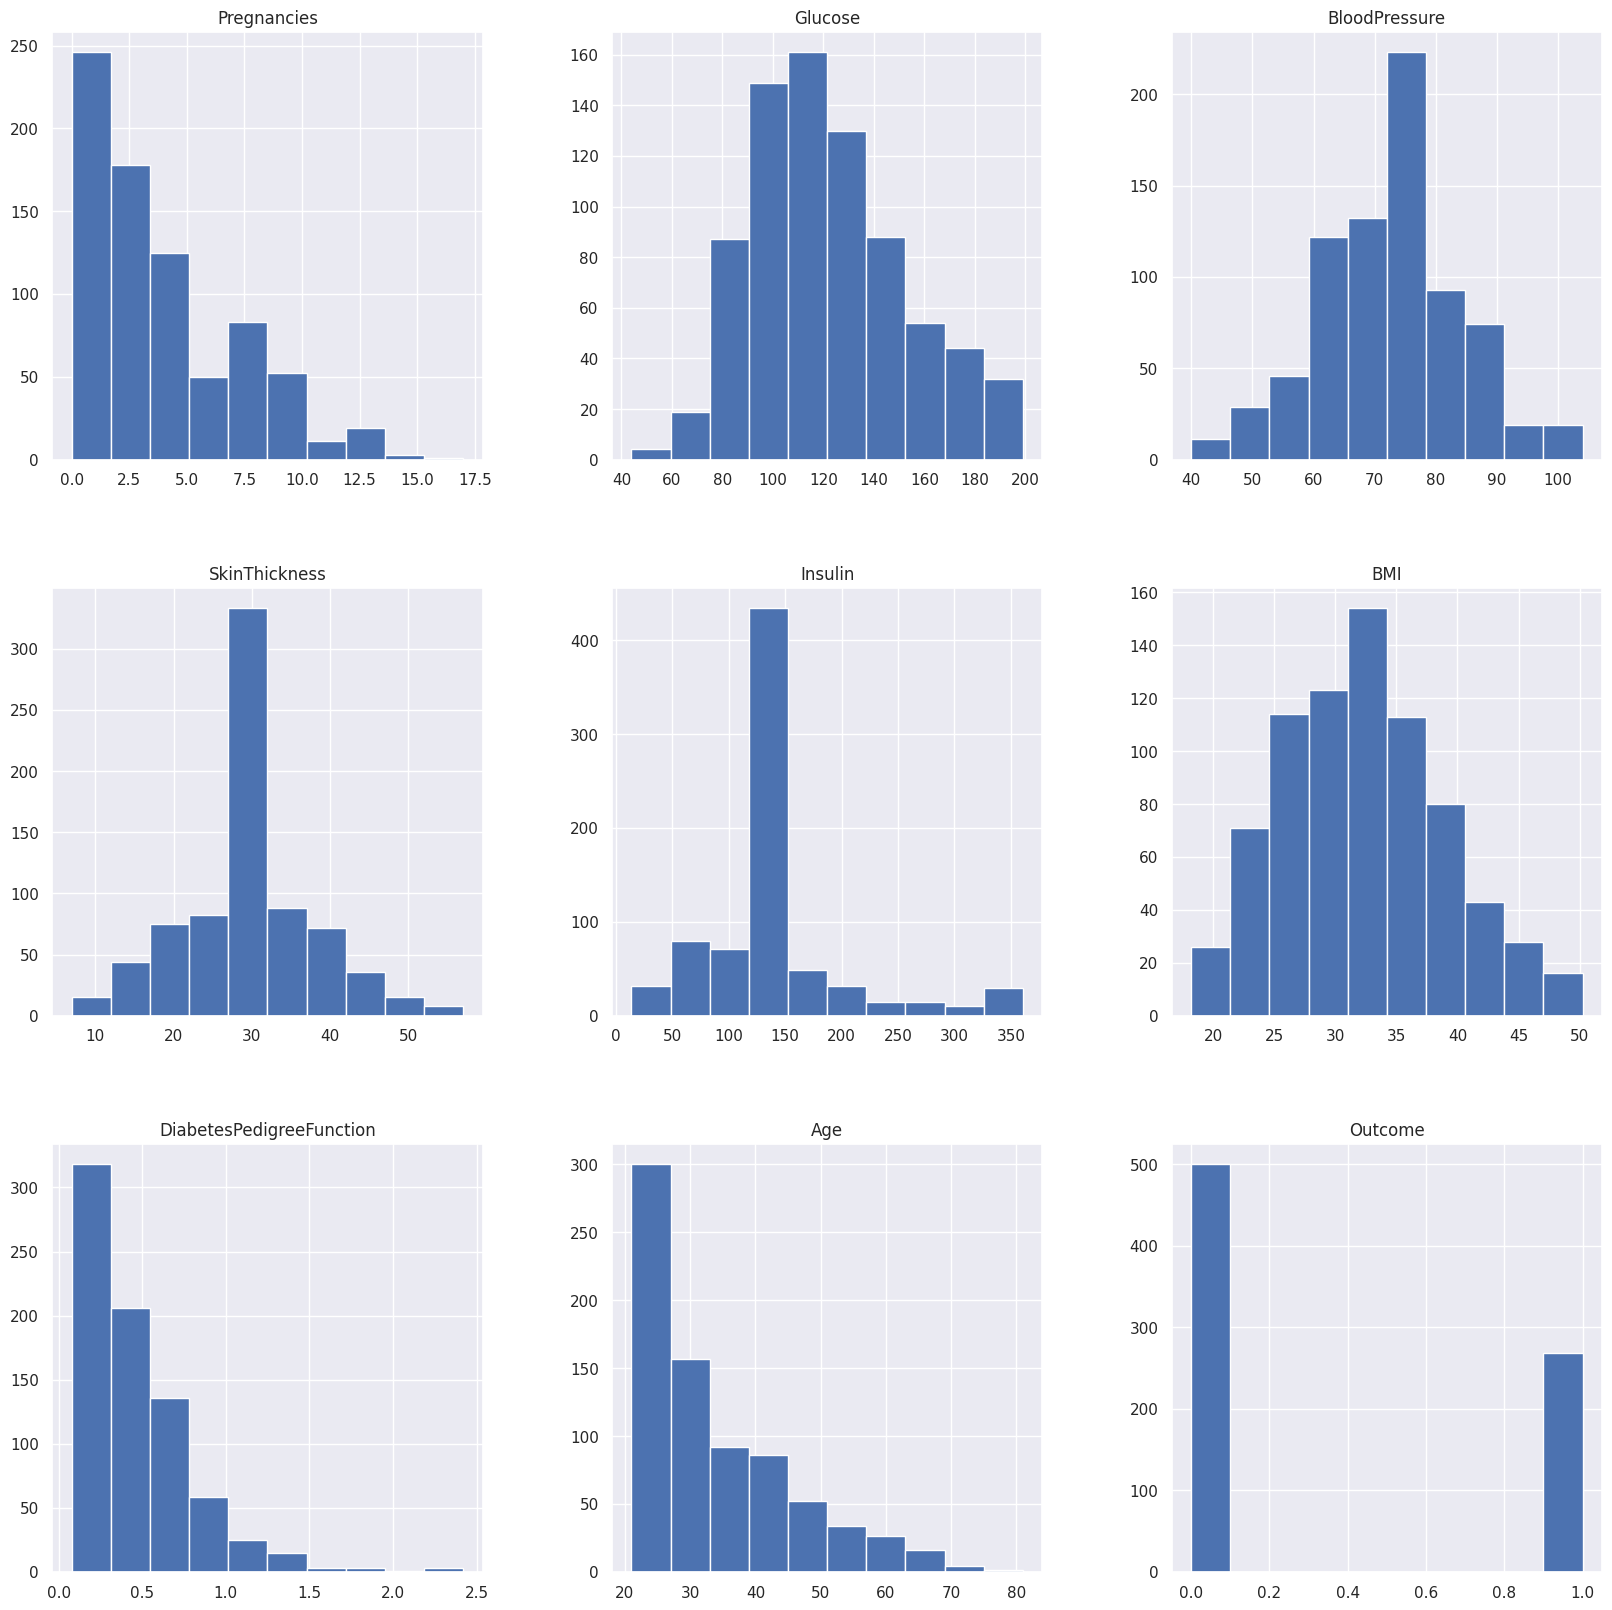

In [ ]:
p = diabetes_df_copy.hist(figsize = (20,20))

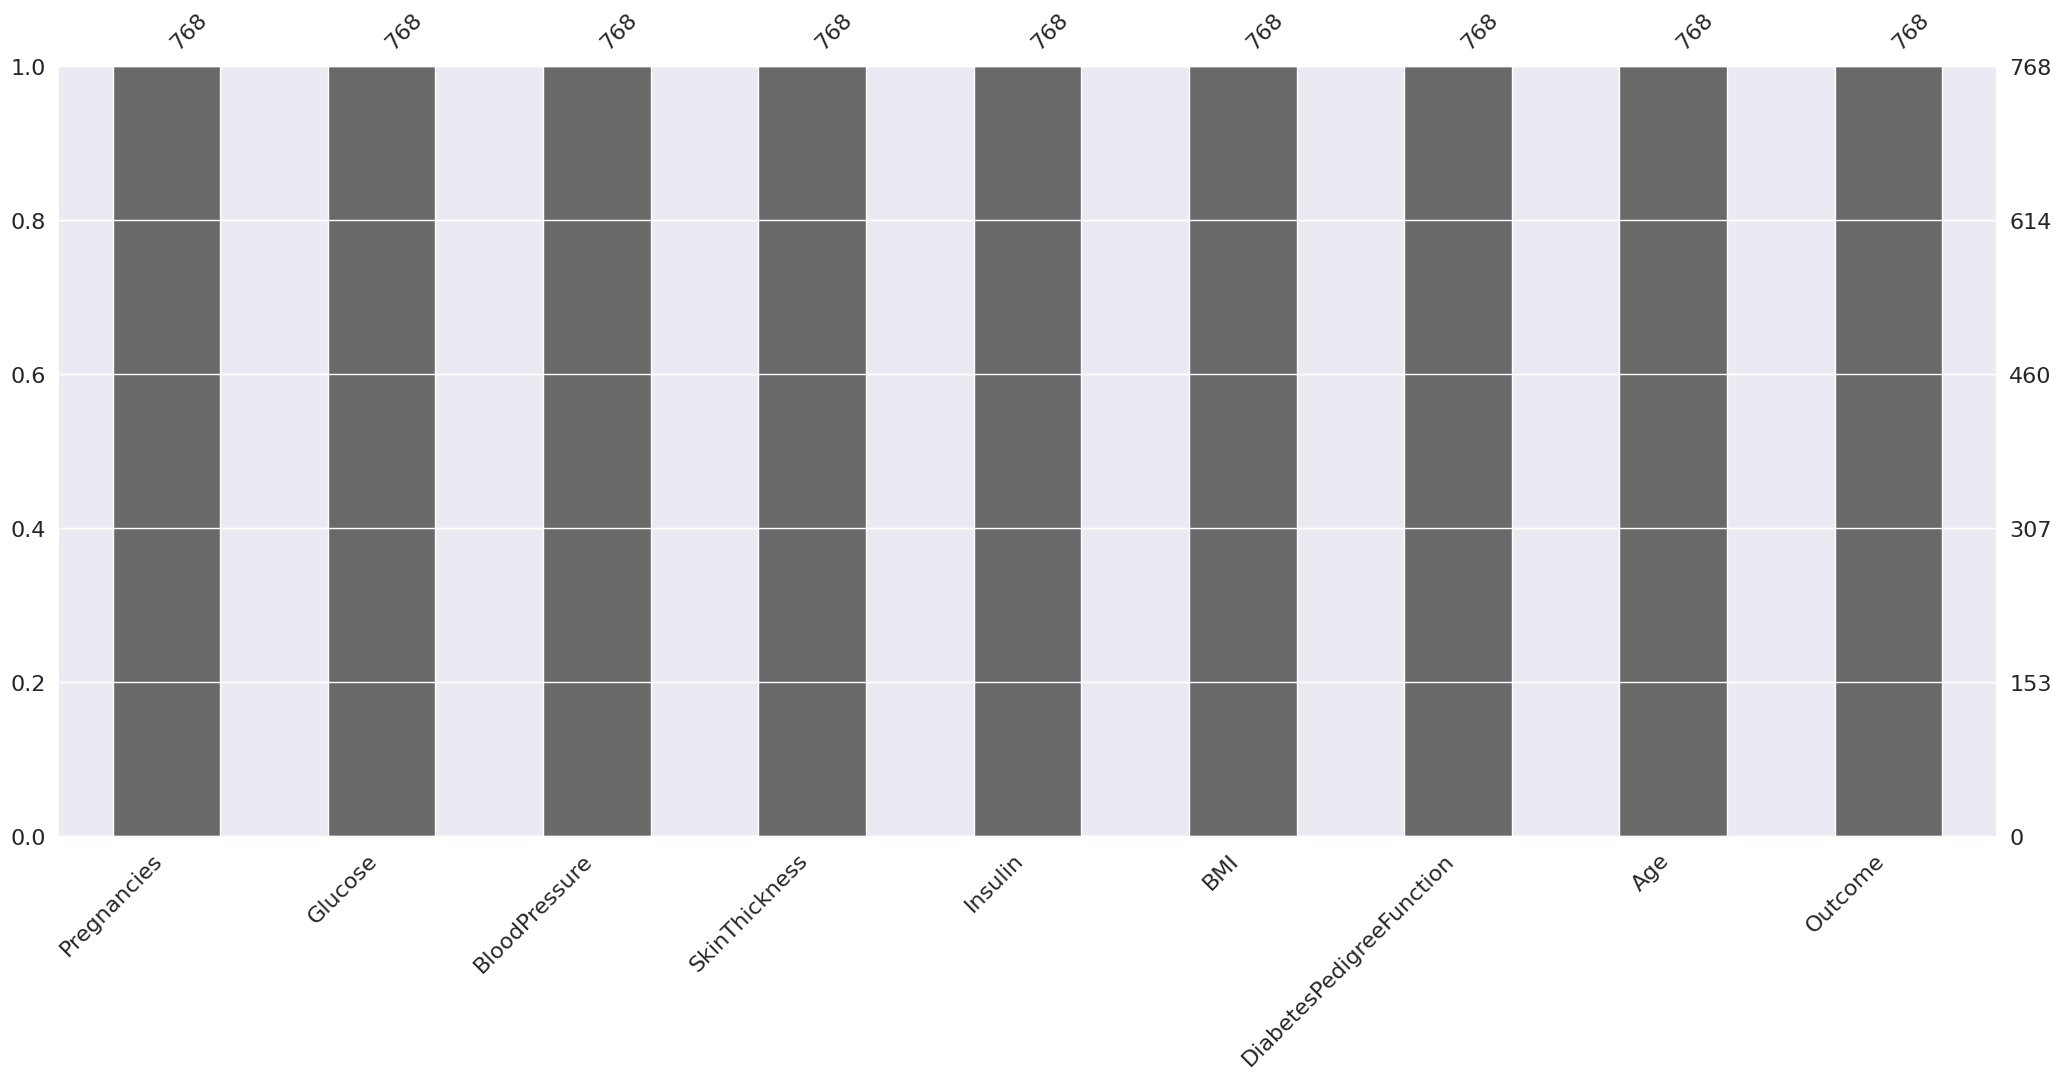

In [ ]:
#null count analysis plot
p = msno.bar(diabetes_df)

In [ ]:
#plot to check balance of data
color_wheel = {1: "#0392cf",2:"#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x:color_wheel.get(x + 1))
print (diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind ="bar")


Outcome
0    500
1    268
Name: count, dtype: int64


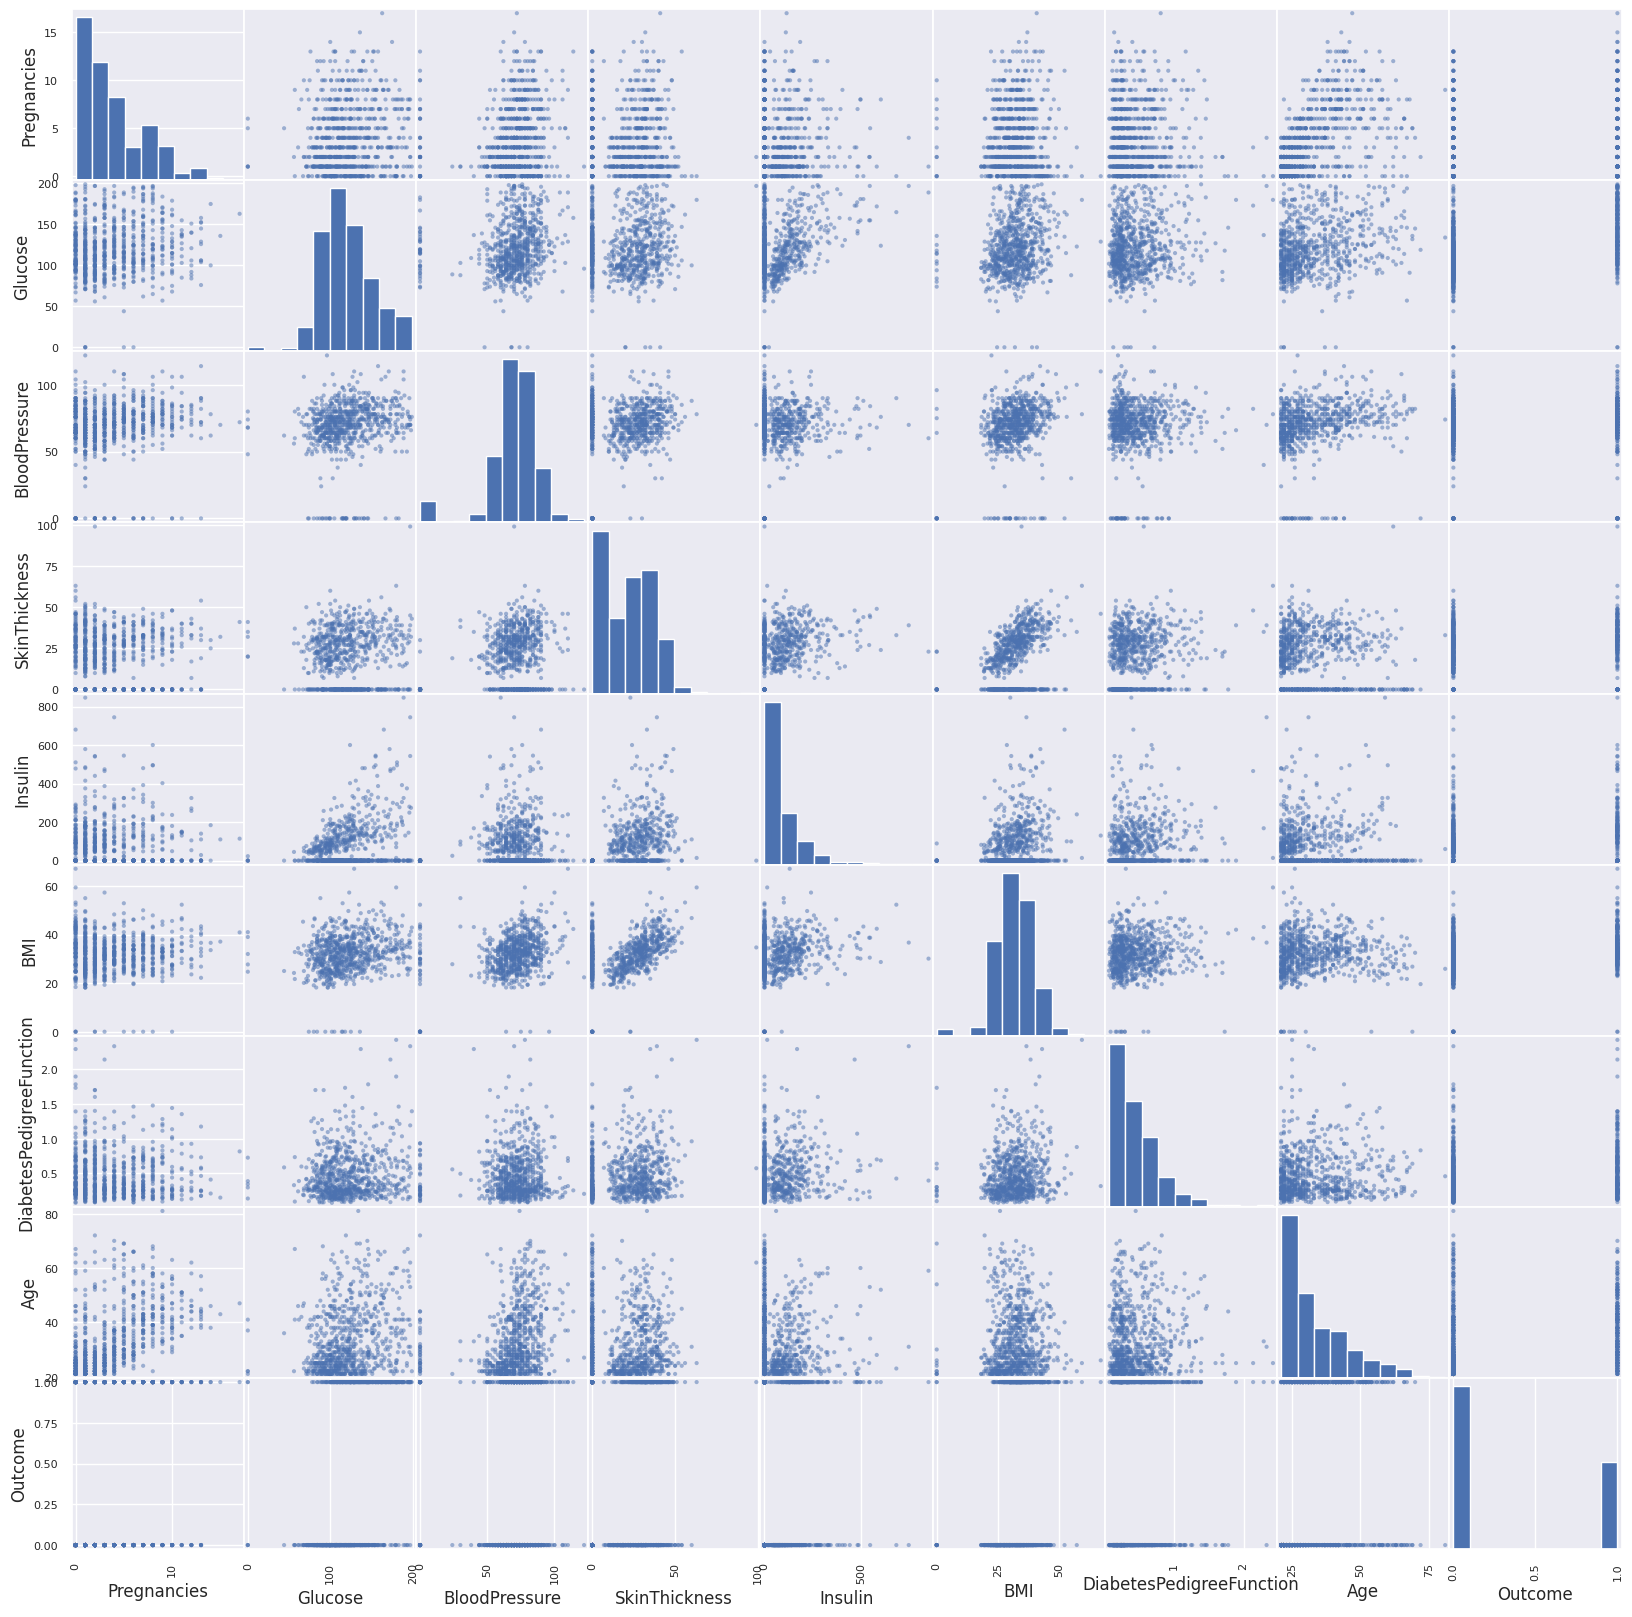

In [ ]:
p = scatter_matrix(diabetes_df,figsize=(20,20))

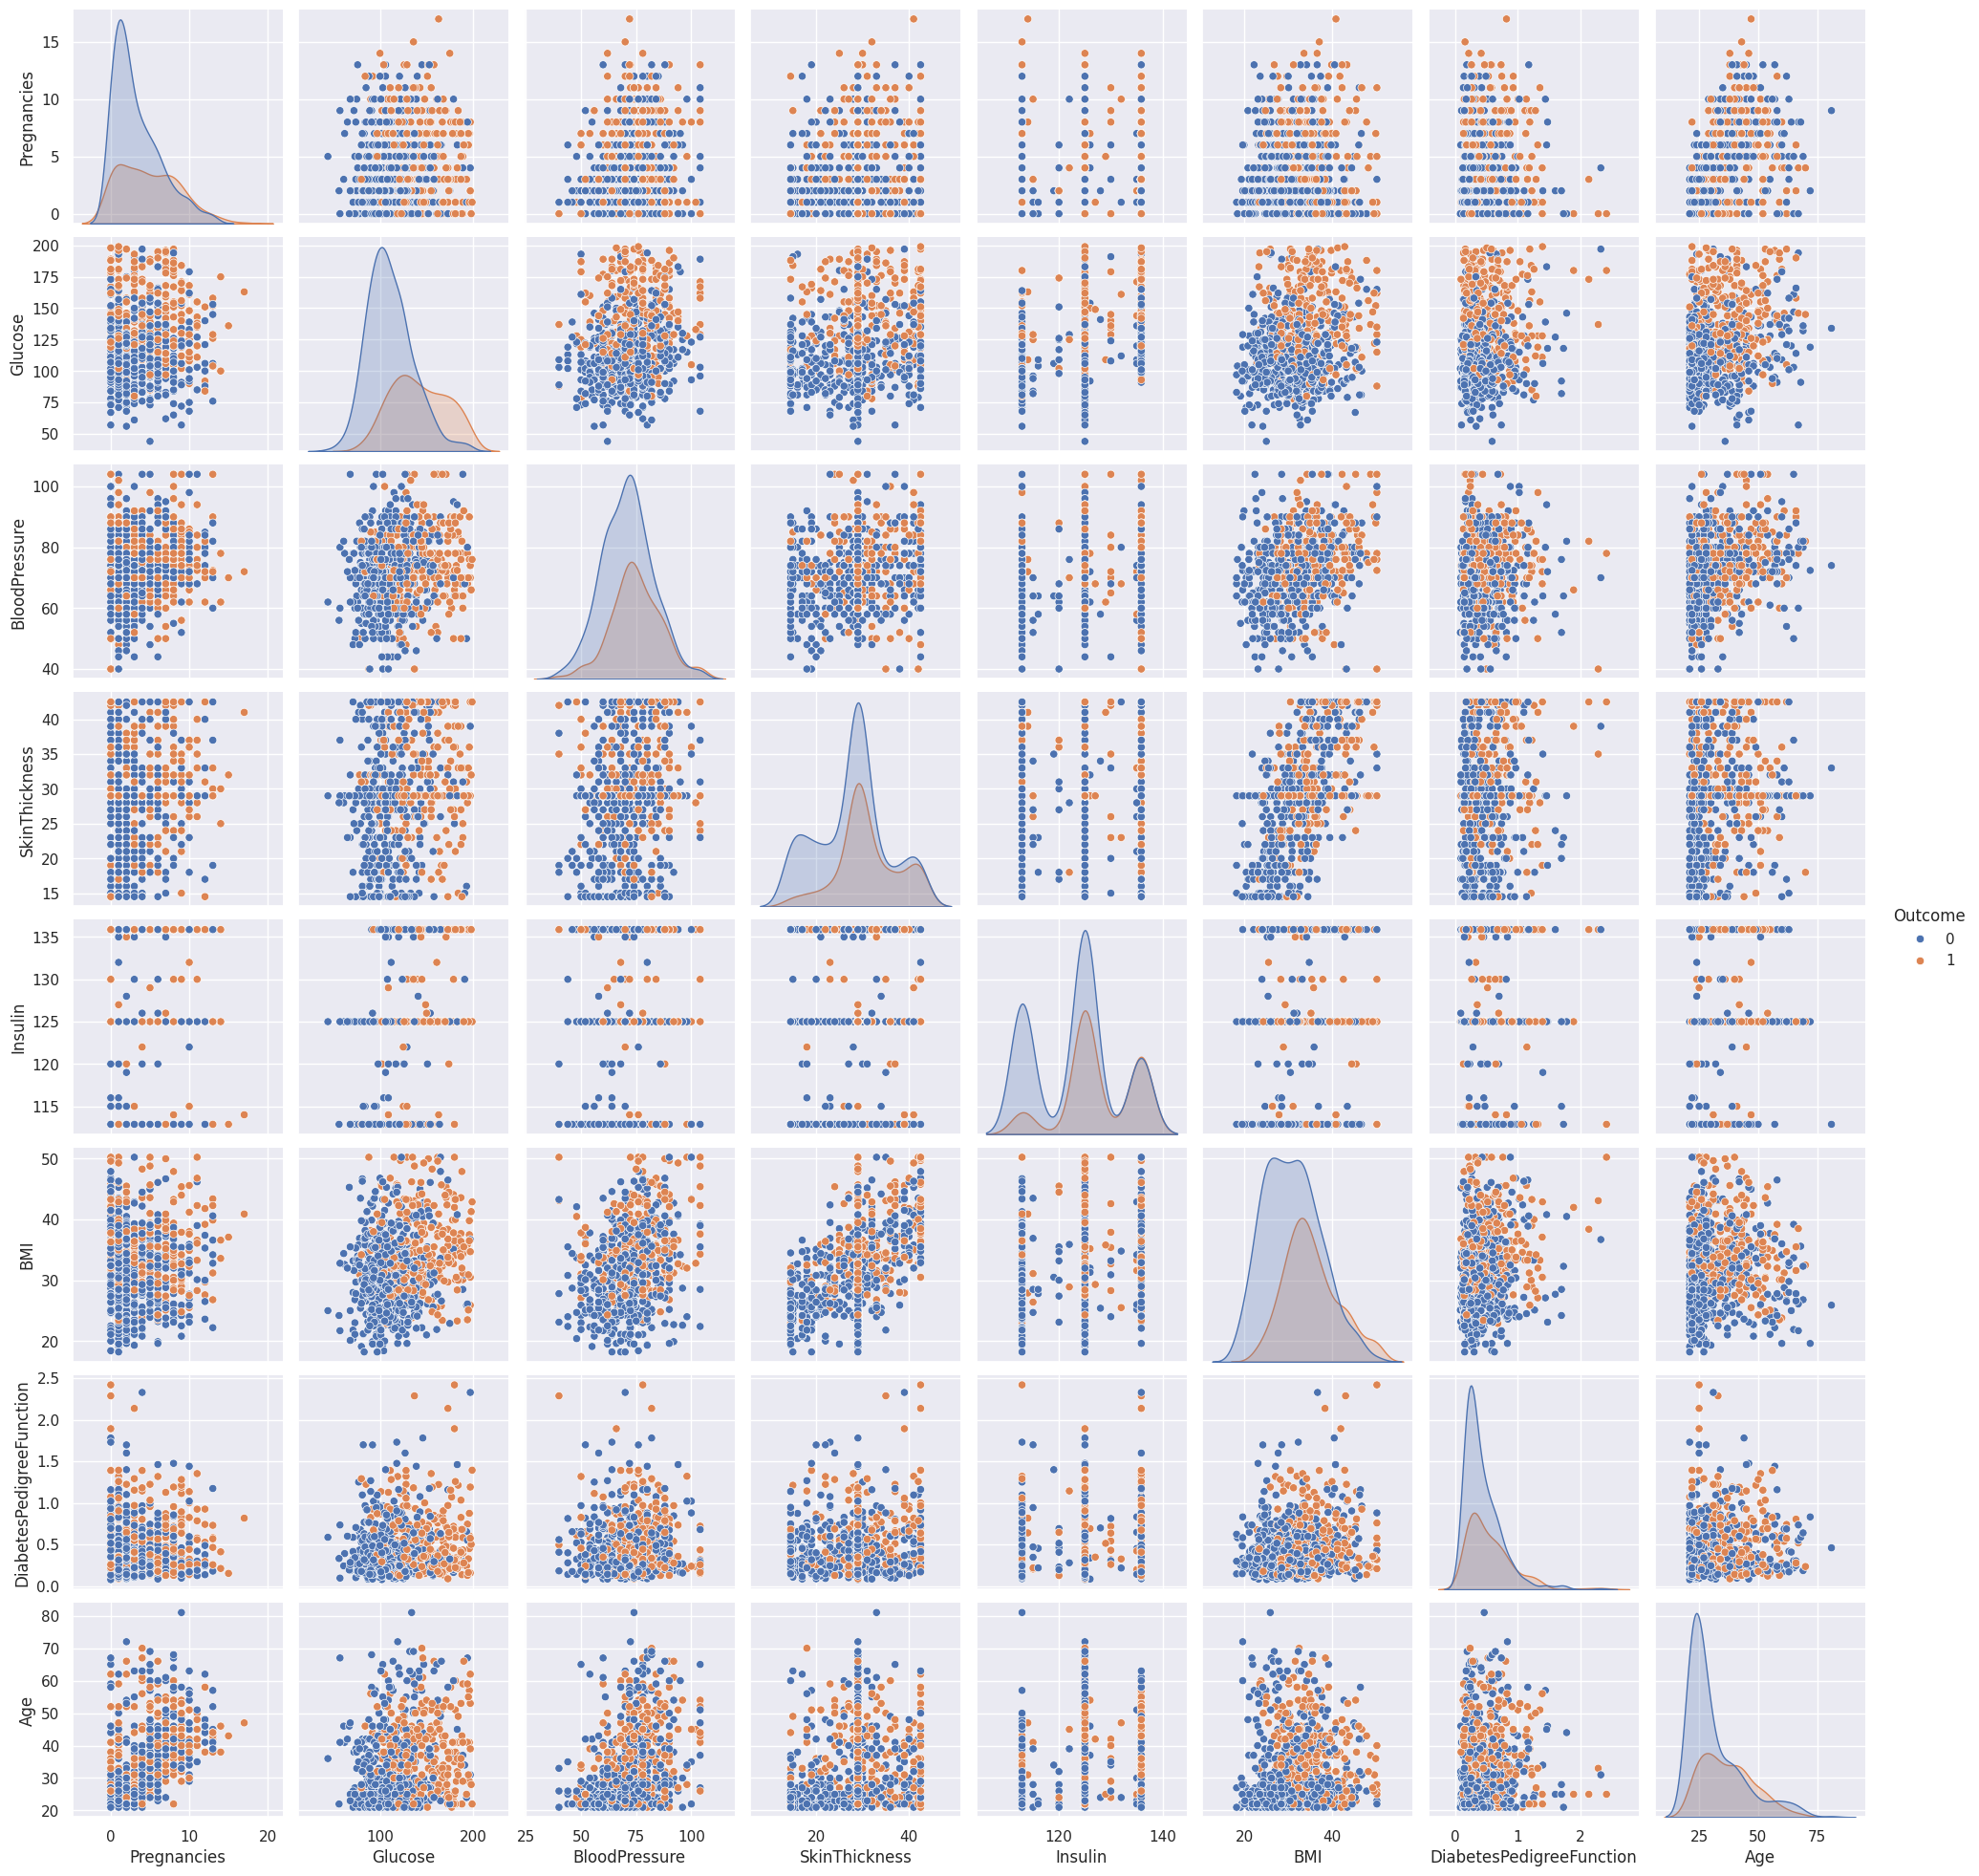

In [ ]:
p = sns.pairplot(diabetes_df_copy,hue= 'Outcome')

**Correlation between features**

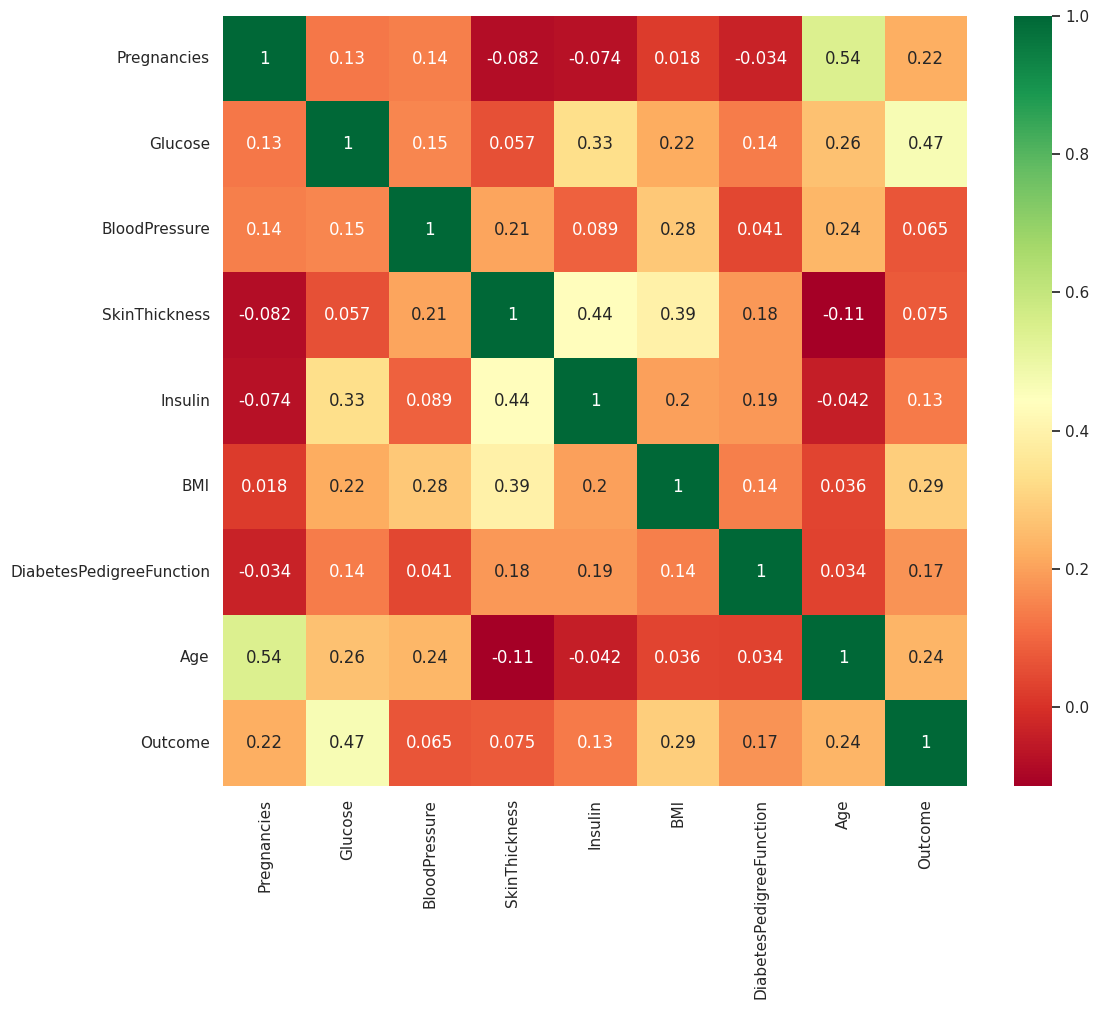

In [ ]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

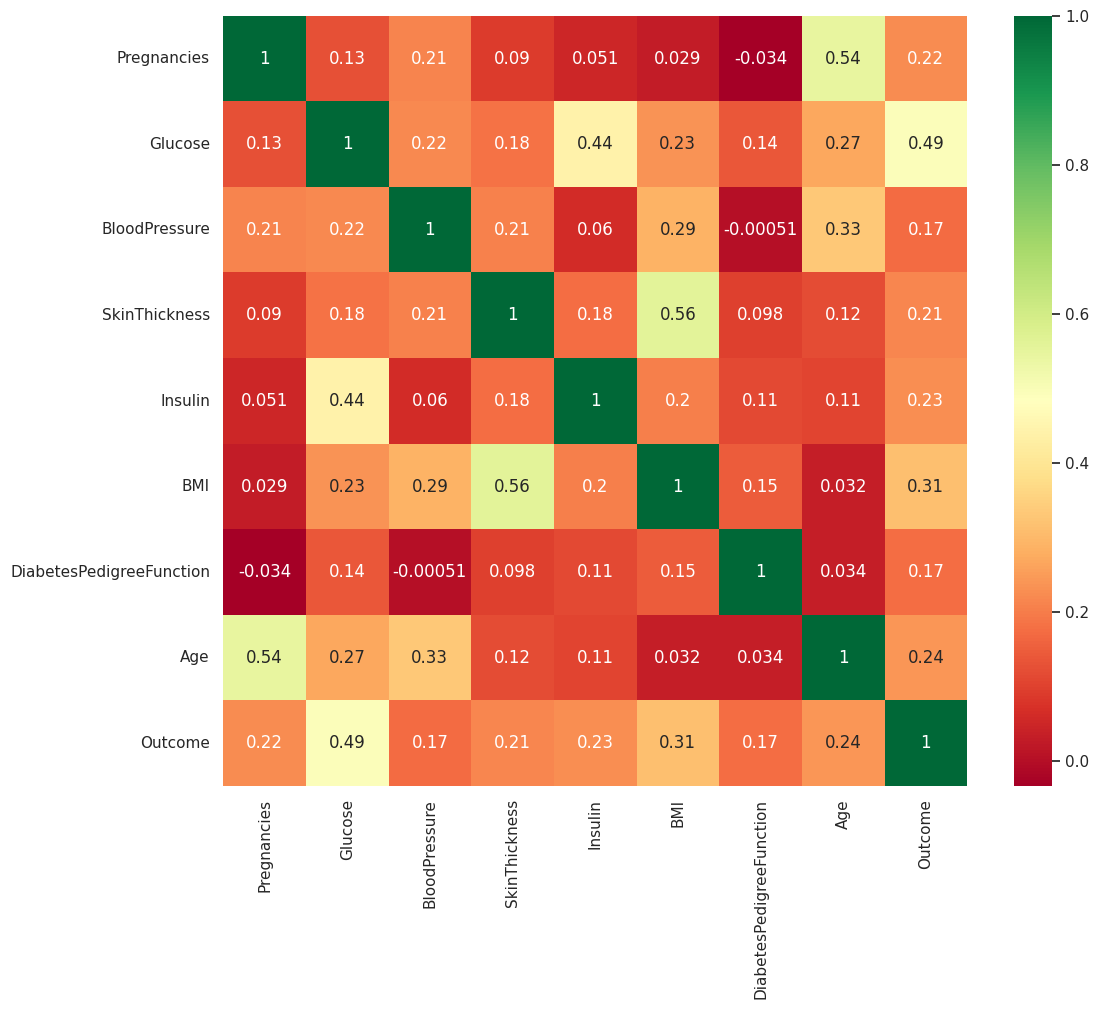

In [ ]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='RdYlGn')

In [ ]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.032095       0.706524 -0.168350  0.181092   
1    -0.844885 -1.206162      -0.545389      -0.004941 -0.168350 -0.869465   
2     1.233880  2.015813      -0.716487      -0.004941 -0.168350 -1.364728   
3    -0.844885 -1.074652      -0.545389      -0.716405 -0.641503 -0.644346   
4    -1.141852  0.503458      -2.769661       0.706524  0.487959  1.606849   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [ ]:
y = diabetes_df_copy.Outcome

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)


**Model Building**

**Logistic Regression**

In [ ]:
# Initialize the Logistic Regression model

log_reg = LogisticRegression(random_state=42)

In [ ]:
# Train the model on the training data

log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:

# Predict on the test data
y_pred_log = log_reg.predict(x_test)
y_pred_proba_log = log_reg.predict_proba(x_test)[:, 1]


In [ ]:
# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", log_reg.score(x_train, y_train))
log_cnf_matrix = confusion_matrix(y_train, y_pred_log)
plt.figure(figsize=(7, 5))
sns.heatmap(pd.DataFrame(log_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("\nClassification Report:\n", classification_report(y_train, y_pred_log))

Logistic Regression Results:


NameError: name 'log_reg' is not defined

Logistic Regression Results:
Accuracy: 0.73828125


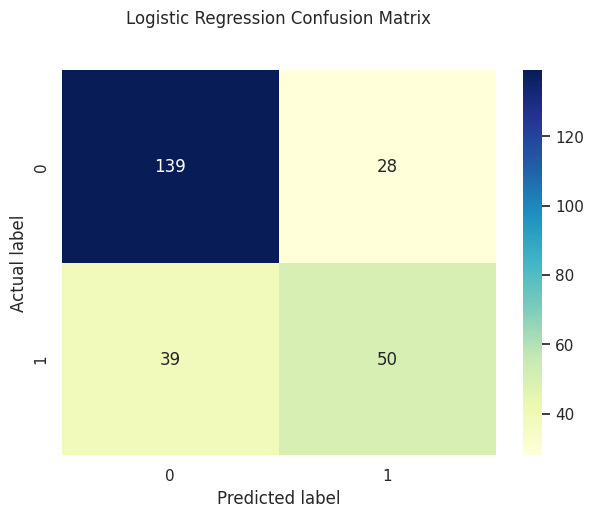


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       167
           1       0.64      0.56      0.60        89

    accuracy                           0.74       256
   macro avg       0.71      0.70      0.70       256
weighted avg       0.73      0.74      0.73       256



In [ ]:
# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", log_reg.score(x_test, y_test))
log_cnf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(7, 5))
sns.heatmap(pd.DataFrame(log_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

In [ ]:

# ROC and AUC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

print("ROC AUC Score:", roc_auc_log)

ROC AUC Score: 0.8245307138531925


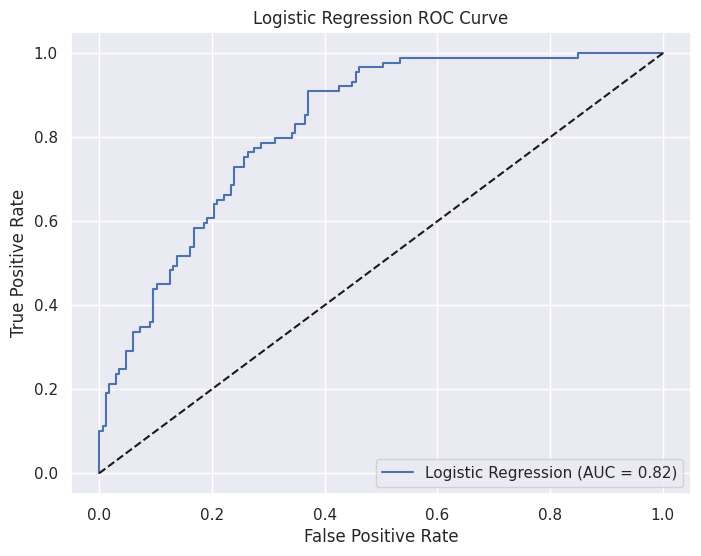

In [ ]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

In [ ]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)


In [ ]:
# Train the model on the training data
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test data
y_pred_rf = random_forest.predict(x_test)
y_pred_proba_rf = random_forest.predict_proba(x_test)[:, 1]

Random Forest Results:
Accuracy: 0.7265625


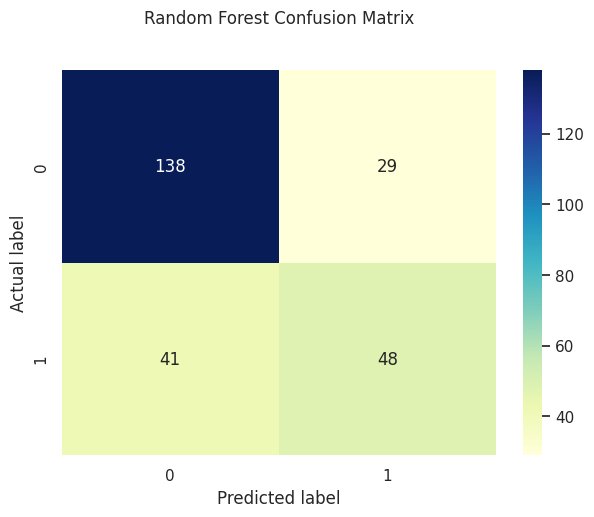


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       167
           1       0.62      0.54      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



In [ ]:
# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", random_forest.score(x_test, y_test))
# Confusion Matrix
rf_cnf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Random Forest Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
# ROC and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("ROC AUC Score:", roc_auc_rf)


ROC AUC Score: 0.8203592814371257


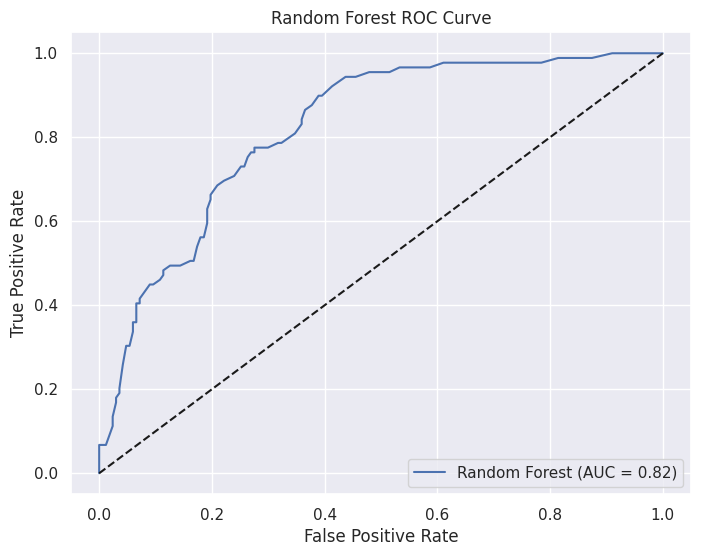

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Conclusion

This project demonstrated the application of machine learning techniques in diabetes prediction. Random Forest outperformed Logistic Regression in terms of predictive accuracy and robustness, making it a better candidate for real-world deployment. However, Logistic Regression remains valuable for its interpretability. Future work could explore advanced ensemble techniques and address class imbalance with oversampling or SMOTE.

#References

 https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

 https://scikit-learn.org/stable/user_guide.html